#**Assignment6**



In [104]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pywt

##**Chirp Signal**:   $x(t)=Acos(\theta(t))=Acos(2\pi f(t)t+\phi_0)$
###where, $f(t)= kt + f_0$

Text(0, 0.5, 'Amplitude')

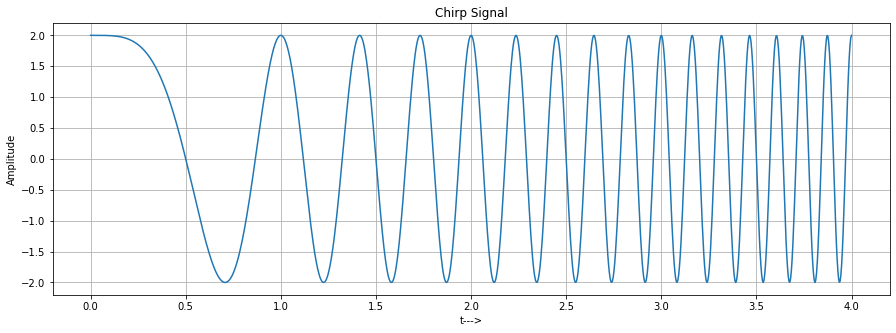

In [105]:
#Chirp signal function

def chirp(A,t,k):
  f=k*t    #f_0=0
  return A*np.cos(2*np.pi*f*t)

t=np.linspace(0,4,1000)
plt.figure(1,figsize=(15,5))
plt.plot(t,chirp(2,t,1))
plt.grid(True)

plt.title("Chirp Signal")
plt.xlabel("t--->")
plt.ylabel("Amplitude")

#Subband Decomposition

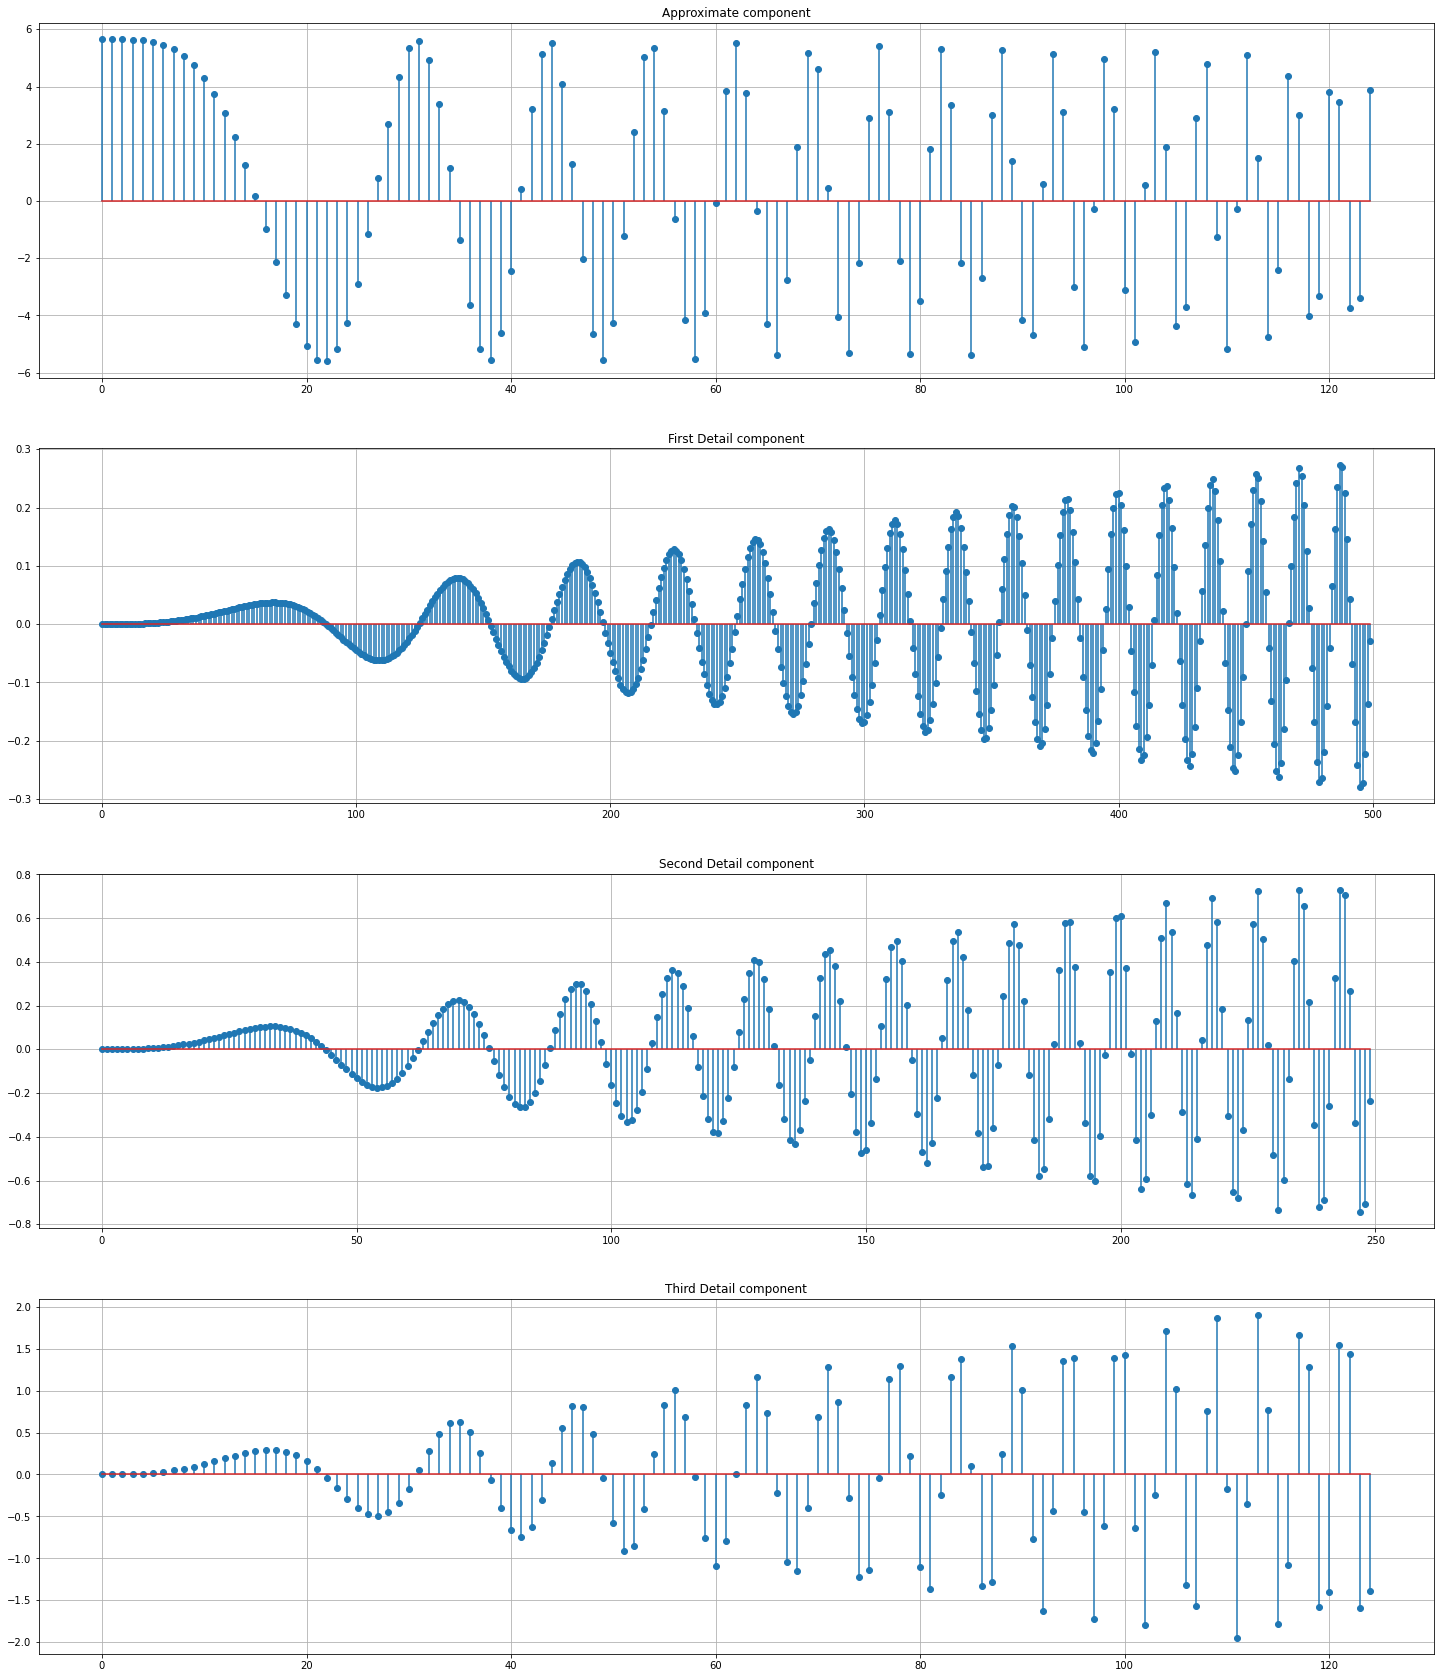

In [106]:
#Wavelet decomposition of Chirp signal

coeffs = pywt.wavedec(chirp(2,t,1), 'db1', level=3)  #Coefficients of wavelets
CA,CD3,CD2,CD1=coeffs  #Approximation and details component

#Plotting of Components of Wavelet Decomposition
label=["Approximate component","First Detail component","Second Detail component","Third Detail component"]
Comp=[CA,CD1,CD2,CD3]
plt.figure(1,figsize=(25,30))

for i in range(4):
  plt.subplot(4,1,1+i)
  plt.stem(Comp[i],use_line_collection=True)
  plt.title(label[i])
  plt.grid(True)

#HeaviSine Signal with Additive Gaussian Noise  (SNR=15dB)

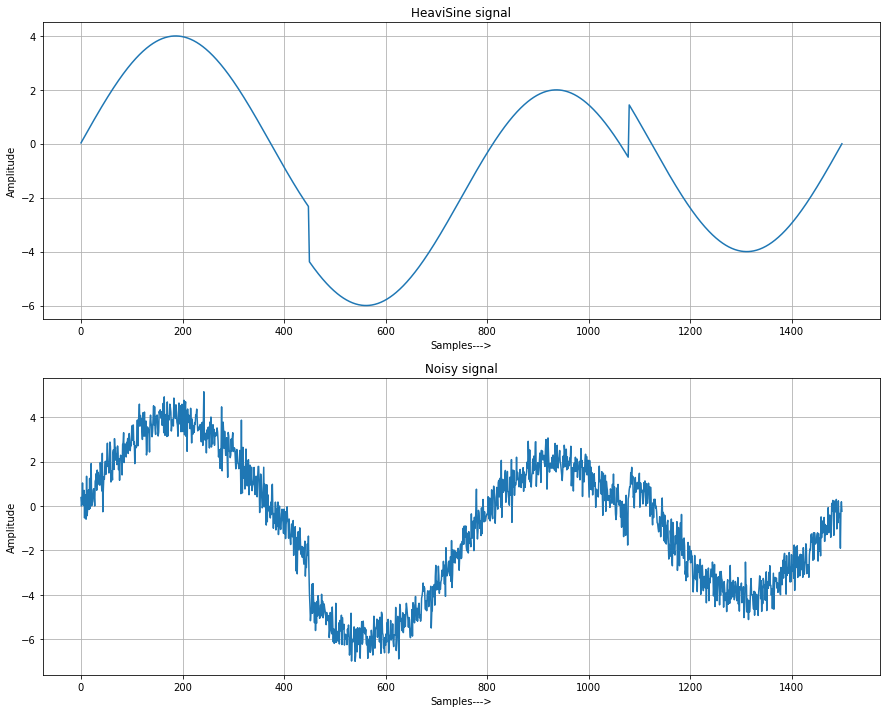

In [107]:
x=pywt.data.demo_signal(name='HeaviSine', n=1500)  #HeaviSine Signal

#Plot of HeaviSine Signal
fig =plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(x)
plt.title('HeaviSine signal')
plt.ylabel('Amplitude')
plt.xlabel('Samples--->')
plt.grid(True)




output_snr_dB = 15  #Desired dB value

x_watts=x**2  #signal in watts
sig_avg_watts = np.mean(x_watts)  #avg of signal in watts
sig_avg_dB = 10 * np.log10(sig_avg_watts)  #avg of signal in dB

noise_avg_dB = sig_avg_dB - output_snr_dB

noise_avg_watts = 10 ** (noise_avg_dB / 10) #converting to watts
noise_volts = np.random.normal(0, np.sqrt(noise_avg_watts), len(x_watts)) #additive Gaussian noise

y = x + noise_volts  #Adding noise to Heavisine signal

plt.subplot(2,1,2)
plt.plot(y)
plt.title('Noisy signal')
plt.ylabel('Amplitude')
plt.xlabel('Samples--->')
plt.grid(True)

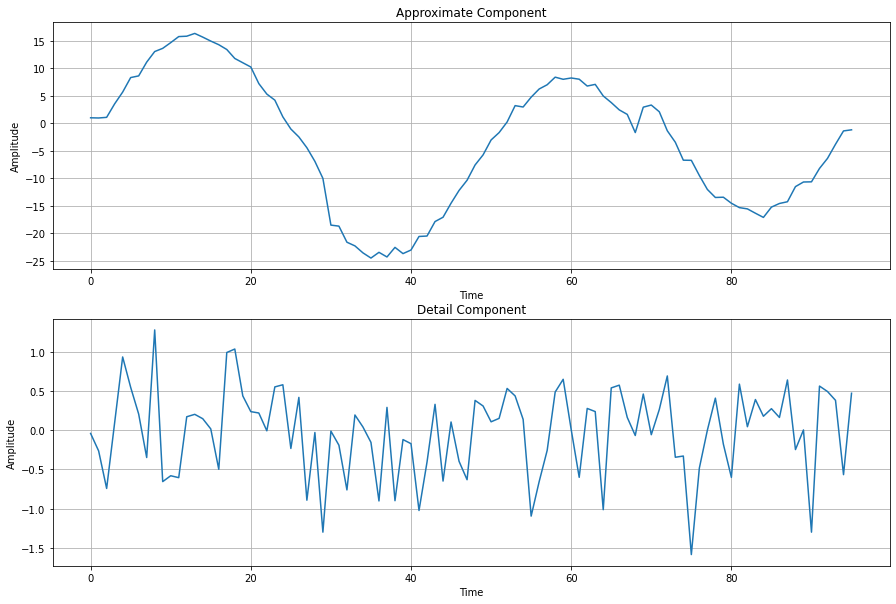

In [131]:
approxi_heavi = pywt.downcoef('a',y, 'db2', mode='sym', level=4)
detail_heavi = pywt.downcoef('d',y, 'db2', mode='sym', level=4)

components = [approxi_heavi,detail_heavi]
name = ["Approximate","Detail"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(components)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(components[k])
    plt.title(str(name[k])+" Component")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid()
    c =c+1 

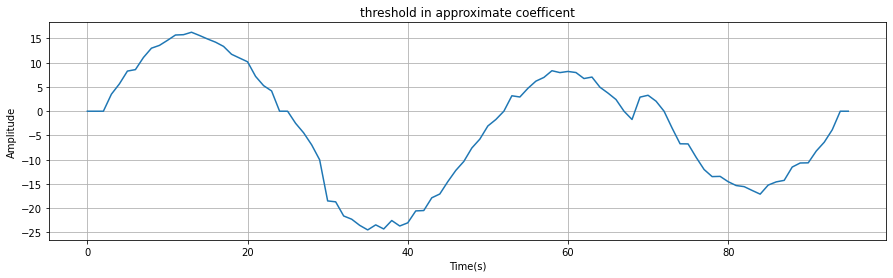

In [132]:
sigma = (np.median(approxi_heavi)/0.6745)

threshold = sigma_Approx*(np.sqrt(2*np.log(len(approxi_heavi))))

approximate_thres = pywt.threshold(approxi_heavi,threshold,mode= 'hard')
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(approximate_thres)
plt.title("threshold in approximate coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

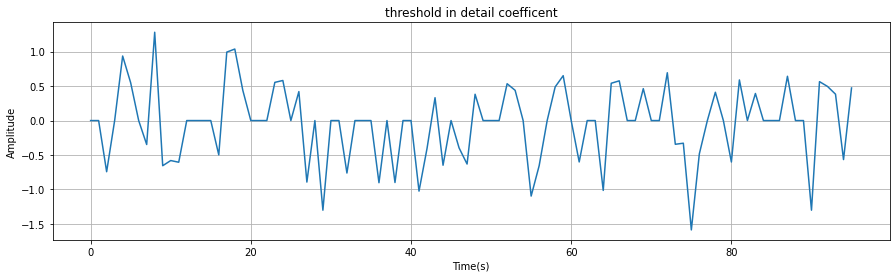

In [133]:
sigma_Detail = (np.median(detail_heavi)/0.6745)
threshold_Detail =sigma_Detail*(np.sqrt(2*np.log(len(detail_heavi))))
detail_thres = pywt.threshold(detail_heavi,threshold_Detail,mode="hard")
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(detail_thres)
plt.title("threshold in detail coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

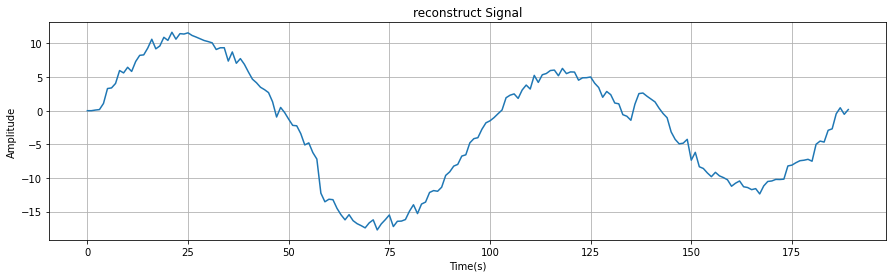

In [134]:
reconstruct_signal= pywt.idwt(approximate_thres,detail_thres, wavelet='db2', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(reconstruct_signal)
plt.title("Reconstructed Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [119]:
#reading csv file

colnames = ['1','2', '3', '4', '5', '6']
data_r=pd.read_csv("/content/acc_00001.csv",names=colnames)  #Data taken from training set of FEMTO Bearing Dataset(Bearing1_1 folder)
data=data_r['6']  #Taking a column as discrete signal

##Smoothing of Signal after decomposition

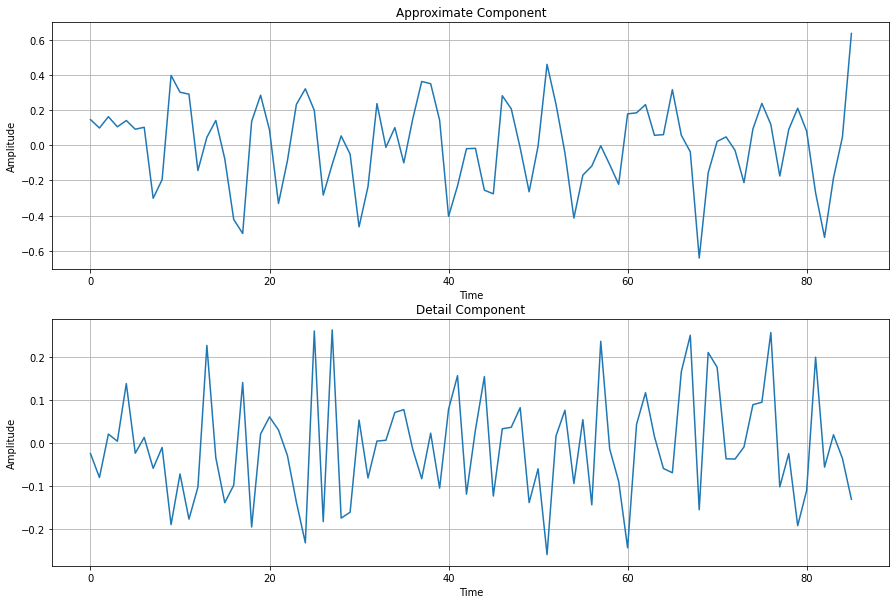

In [143]:
approxi_heavi = pywt.downcoef('a',data, 'db4', mode='sym', level=5)
detail_heavi = pywt.downcoef('d',data, 'db4', mode='sym', level=5)

components = [approxi_heavi,detail_heavi]
name = ["Approximate","Detail"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(components)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(components[k])
    plt.title(str(name[k])+" Component")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid()
    c =c+1 

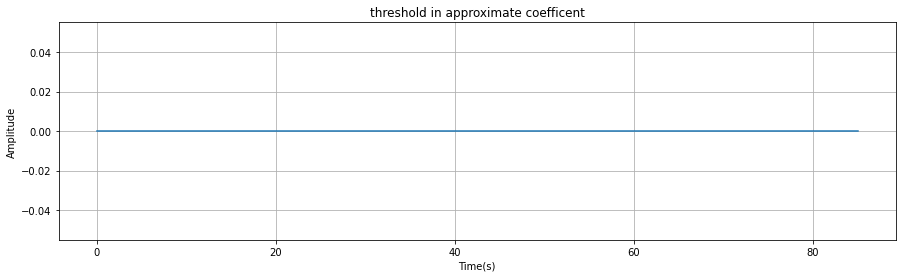

In [144]:
sigma = (np.median(approxi_heavi)/0.6745)

threshold = sigma_Approx*(np.sqrt(2*np.log(len(approxi_heavi))))

approximate_thres = pywt.threshold(approxi_heavi,threshold,mode= 'hard')
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(approximate_thres)
plt.title("threshold in approximate coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

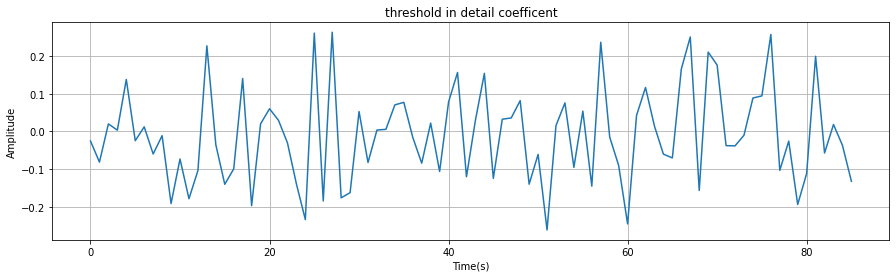

In [145]:
sigma_Detail = (np.median(detail_heavi)/0.6745)
threshold_Detail =sigma_Detail*(np.sqrt(2*np.log(len(detail_heavi))))
detail_thres = pywt.threshold(detail_heavi,threshold_Detail,mode="hard")
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(detail_thres)
plt.title("threshold in detail coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

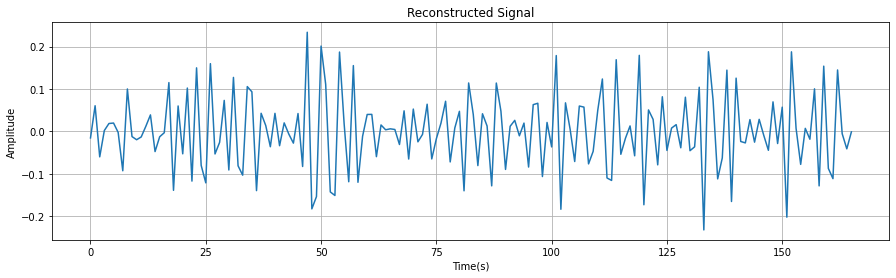

In [147]:
reconstruct_signal= pywt.idwt(approximate_thres,detail_thres, wavelet='db4', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(reconstruct_signal)
plt.title("Reconstructed Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

##Moving Average on Signal

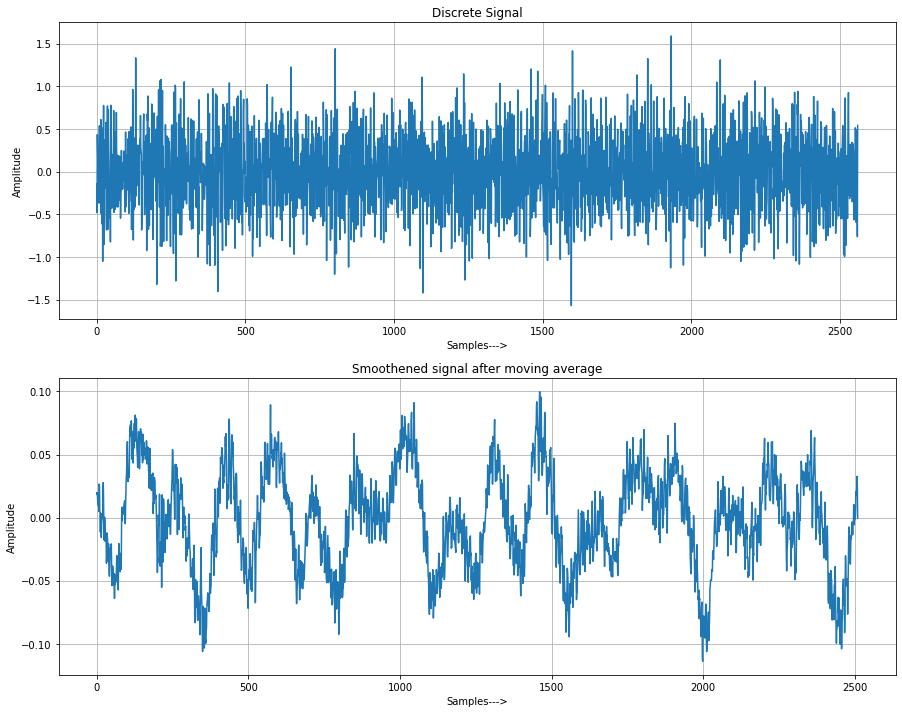

In [122]:
# Function of Moving Average

def moving_avg(sig,p):
  MA=[]
  for i in range(p,len(sig)):
    S=0
    for k in range(p):
      S+=sig[i-k-1]/p
    MA.append(S)
  return np.array(MA)

m_av=moving_avg(data,50)  # MA(50)  model


fig =plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(data)
plt.title('Discrete Signal')
plt.ylabel('Amplitude')
plt.xlabel('Samples--->')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(m_av)
plt.title('Smoothened signal after moving average')
plt.ylabel('Amplitude')
plt.xlabel('Samples--->')
plt.grid(True)
